In [1]:
import prepare

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Percentage-Based

In [2]:
df = pd.read_csv('complete_data.csv')
df.head()

,Unnamed: 0,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df = prepare.update_store_data(df)
df.head()

,Unnamed: 0,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


In [4]:
df.shape

(913000, 17)

In [5]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00


In [6]:
train_size = .60
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

547800

In [7]:
train = df[:test_start_index]
test = df[test_start_index:]

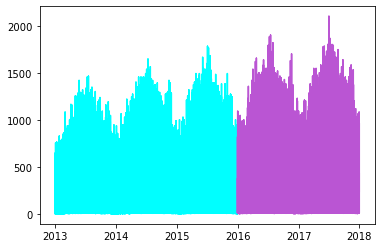

In [8]:
plt.plot(train.index, train.sales_total, color='cyan')
plt.plot(test.index, test.sales_total, color='mediumorchid')

Text(0.5, 1.0, 'Sales Total by Day')

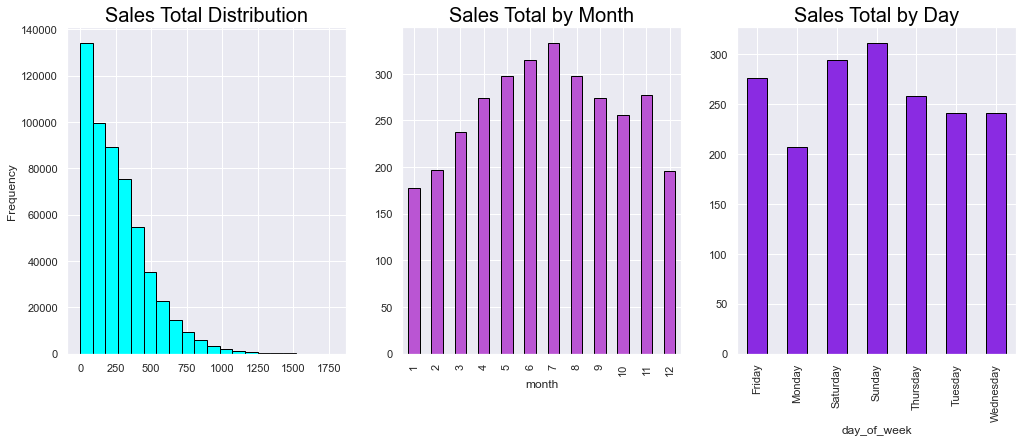

In [24]:
plt.subplots(1, 3, figsize=(17,6), sharey=True)
sns.set(style="darkgrid")
y = train.sales_total

plt.subplot(1,3,1)
y.plot.hist(bins =20, color='cyan', edgecolor='black')
plt.title('Sales Total Distribution', size=20, color='black')

plt.subplot(1,3,2)
train.groupby('month').sales_total.mean().plot.bar(color='mediumorchid', edgecolor='black')
plt.title('Sales Total by Month',size=20, color='black')

plt.subplot(1,3,3)
train.groupby('day_of_week').sales_total.mean().plot.bar(color='blueviolet', edgecolor='black')
plt.title('Sales Total by Day',size=20, color='black')

In [25]:
train.groupby('day_of_week').describe()

Unnamed: 0                                                \
                 count           mean            std  min        25%   
day_of_week                                                            
Friday         78300.0  456206.525977  263566.503245  3.0  228293.25   
Monday         78000.0  456135.500000  263561.748778  6.0  228070.75   
Saturday       78000.0  456133.500000  263561.748778  4.0  228068.75   
Sunday         78000.0  456134.500000  263561.748778  5.0  228069.75   
Thursday       78500.0  456135.000000  263561.740442  2.0  228068.50   
Tuesday        78500.0  456133.000000  263561.740442  0.0  228066.50   
Wednesday      78500.0  456134.000000  263561.740442  1.0  228067.50   

                                            item_id             ...  month  \
                  50%        75%       max    count       mean  ...    75%   
day_of_week                                                     ...          
Friday       456562.5  684796.75  912262.0  78300.0  25.503844  ...   9.00   
Monday       456135.5  684200.25  912265.0  78000.0  25.500000  ...   9.25   
Saturday     456133.5  684198.25  912263.0  78000.0  25.500000  ...   9.25   
Sunday       456134.5  684199.25  912264.0  78000.0  25.500000  ...   9.25   
Thursday     456135.0  684201.50  912268.0  78500.0  25.500000  ...  10.00   
Tuesday      456133.0  684199.50  912266.0  78500.0  25.500000  ...  10.00   
Wednesday    456134.0  684200.50  912267.0  78500.0  25.500000  ...  10.00   

                  sales_total                                                  \
              max       count        mean         std   min       25%     50%   
day_of_week                                                                     
Friday       12.0     78300.0  275.899958  218.264849  3.00   98.2300  234.36   
Monday       12.0     78000.0  207.378121  164.816769  1.68   73.0600  174.93   
Saturday     12.0     78000.0  293.902034  232.011951  4.20  104.4900  249.34   
Sunday       12.0     78000.0  311.438238  245.330543  4.20  111.7800  264.14   
Thursday     12.0     78500.0  258.396498  205.095470  0.84   92.0700  218.70   
Tuesday      12.0     78500.0  241.070271  191.393779  1.68   85.6575  202.92   
Wednesday    12.0     78500.0  241.380648  191.410391  0.00   85.0500  204.36   

                               
                 75%      max  
day_of_week                    
Friday       396.000  1494.04  
Monday       299.040  1166.08  
Saturday     423.800  1767.34  
Sunday       448.380  1785.56  
Thursday     372.015  1530.48  
Tuesday      347.100  1439.38  
Wednesday    347.100  1302.73  

[7 rows x 88 columns]

In [26]:
train.groupby('month').describe()

Unnamed: 0                                                            \
           count           mean            std    min        25%       50%   
month                                                                        
1        46800.0  456091.912051  263570.886694    0.0  228255.75  456508.5   
2        42000.0  455996.500000  263563.177057   31.0  228013.75  455996.5   
3        46500.0  456026.000000  263562.873434   59.0  228042.50  456026.0   
4        45000.0  456056.500000  263562.967894   90.0  228073.25  456056.5   
5        46500.0  456087.000000  263562.873434  120.0  228103.50  456087.0   
6        45000.0  456117.500000  263562.967894  151.0  228134.25  456117.5   
7        46500.0  456148.000000  263562.873434  181.0  228164.50  456148.0   
8        46500.0  456179.000000  263562.873434  212.0  228195.50  456179.0   
9        45000.0  456209.500000  263562.967894  243.0  228226.25  456209.5   
10       46500.0  456240.000000  263562.873434  273.0  228256.50  456240.0   
11       45000.0  456270.500000  263562.967894  304.0  228287.25  456270.5   
12       46500.0  456301.000000  263562.873434  334.0  228317.50  456301.0   

                            item_id             ...    item_upc14  \
             75%       max    count       mean  ...           75%   
month                                           ...                 
1      684756.25  911934.0  46800.0  25.506432  ...  6.030842e+11   
2      683979.25  911962.0  42000.0  25.500000  ...  6.030842e+11   
3      684009.50  911993.0  46500.0  25.500000  ...  6.030842e+11   
4      684039.75  912023.0  45000.0  25.500000  ...  6.030842e+11   
5      684070.50  912054.0  46500.0  25.500000  ...  6.030842e+11   
6      684100.75  912084.0  45000.0  25.500000  ...  6.030842e+11   
7      684131.50  912115.0  46500.0  25.500000  ...  6.030842e+11   
8      684162.50  912146.0  46500.0  25.500000  ...  6.030842e+11   
9      684192.75  912176.0  45000.0  25.500000  ...  6.030842e+11   
10     684223.50  912207.0  46500.0  25.500000  ...  6.030842e+11   
11     684253.75  912237.0  45000.0  25.500000  ...  6.030842e+11   
12     684284.50  912268.0  46500.0  25.500000  ...  6.030842e+11   

                    sales_total                                         \
                max       count        mean         std   min      25%   
month                                                                    
1      8.846237e+11     46800.0  177.543616  138.594493  0.00   63.180   
2      8.846237e+11     42000.0  197.069605  153.792731  1.68   70.890   
3      8.846237e+11     46500.0  237.470011  184.333065  3.00   85.560   
4      8.846237e+11     45000.0  274.131260  211.806013  5.04  100.080   
5      8.846237e+11     46500.0  297.581444  230.003369  5.04  108.420   
6      8.846237e+11     45000.0  315.359146  243.312822  5.04  114.420   
7      8.846237e+11     46500.0  333.142783  256.538189  5.88  121.720   
8      8.846237e+11     46500.0  297.654839  230.135763  5.88  108.180   
9      8.846237e+11     45000.0  274.558847  211.966565  4.20  100.080   
10     8.846237e+11     46500.0  255.857997  198.082416  3.36   92.400   
11     8.846237e+11     45000.0  277.170912  214.346808  4.20  100.980   
12     8.846237e+11     46500.0  195.726292  152.435038  0.84   70.725   

                                  
          50%       75%      max  
month                             
1      152.64  256.3600  1002.10  
2      168.99  285.0900  1065.87  
3      204.74  343.2000  1320.95  
4      237.06  394.8000  1494.04  
5      257.58  428.4000  1494.04  
6      273.65  453.0400  1667.13  
7      287.70  479.6000  1785.56  
8      257.58  427.8900  1484.93  
9      238.14  395.1600  1393.83  
10     220.57  369.1525  1384.72  
11     239.73  399.5225  1494.04  
12     168.60  282.9600  1002.10  

[12 rows x 80 columns]

Text(0.5, 1.0, 'Sales Total by Month')

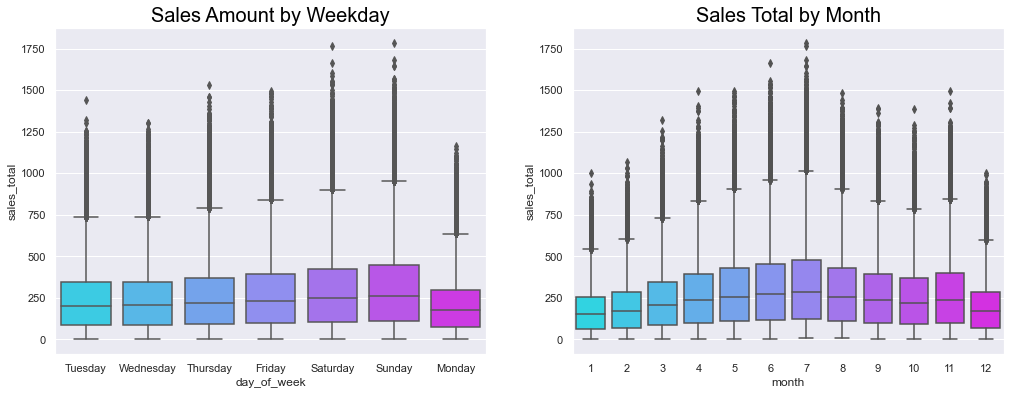

In [31]:
plt.subplots(1, 2, figsize=(17,6), sharey=True)
sns.set(style="darkgrid")
y = train.sales_total

plt.subplot(1,2,1)
sns.boxplot(data = train, x = 'day_of_week', y = 'sales_total', palette='cool')
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(1,2,2)
sns.boxplot(data = train, x = 'month', y = 'sales_total', palette='cool')
plt.title('Sales Total by Month',size=20, color='black')

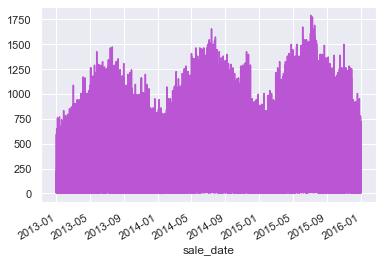

In [35]:
y = train.sales_total
y.plot(color='mediumorchid');

<AxesSubplot:title={'center':'Monthly Total Sales Avg.'}, xlabel='sale_date'>

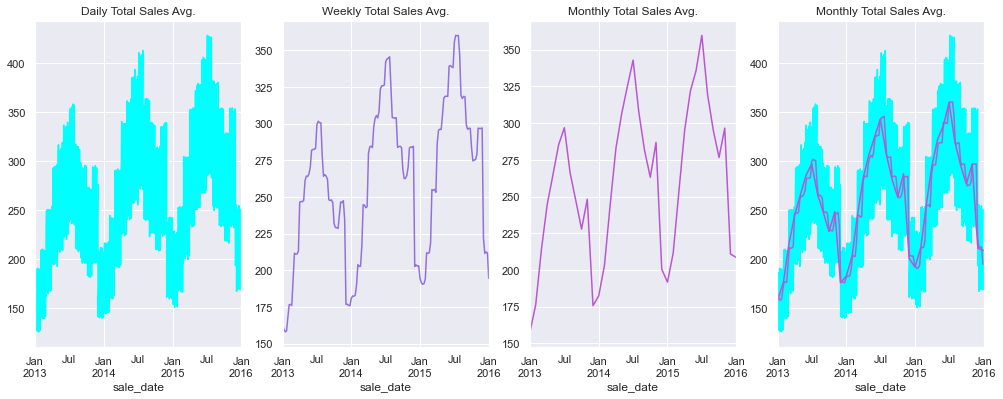

In [48]:
plt.subplots(1, 4, figsize=(17,6), sharey=True)
sns.set(style="darkgrid")
y = train.sales_total

plt.subplot(1,4,1)
y.resample('D').mean().plot(title='Daily Total Sales Avg.', color='cyan')

plt.subplot(1,4,2)
y.resample('W').mean().plot(title='Weekly Total Sales Avg.', color='mediumpurple')

plt.subplot(1,4,3)
y.resample('M').mean().plot(title='Monthly Total Sales Avg.', color='mediumorchid')

plt.subplot(1,4,4)
y.resample('D').mean().plot(title='Daily Total Sales Avg.', color='cyan')
y.resample('W').mean().plot(title='Weekly Total Sales Avg.', color='mediumpurple')
y.resample('M').mean().plot(title='Monthly Total Sales Avg.', color='mediumorchid')

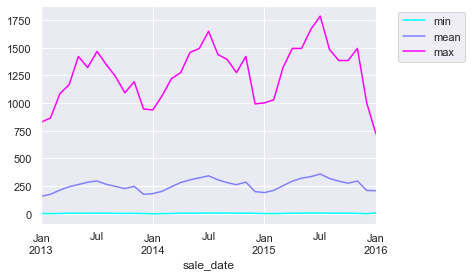

In [51]:
y = train.sales_total
y.resample('M').agg(['min', 'mean', 'max']).plot(cmap='cool')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

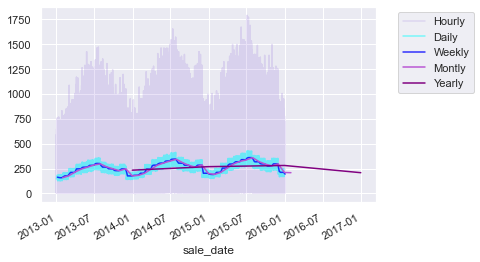

In [58]:
y.plot(alpha=.2, label='Hourly', color='mediumpurple')
y.resample('D').mean().plot(alpha=.5, label='Daily', color='cyan')
y.resample('W').mean().plot(alpha=.8, label='Weekly', color='blue')
y.resample('M').mean().plot(label='Montly', color='mediumorchid')
y.resample('Y').mean().plot(label='Yearly', color='purple')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

<AxesSubplot:xlabel='sale_date'>

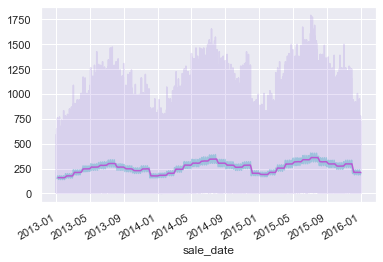

In [61]:
y.plot(alpha=.2, label='Hourly', color='mediumpurple')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day', color='c')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week', color='mediumorchid')


In [63]:
y.resample('M').mean()

sale_date
2013-01-31 00:00:00+00:00    157.894723
2013-02-28 00:00:00+00:00    176.411855
2013-03-31 00:00:00+00:00    214.181650
2013-04-30 00:00:00+00:00    244.460082
2013-05-31 00:00:00+00:00    264.663123
2013-06-30 00:00:00+00:00    285.261279
2013-07-31 00:00:00+00:00    296.881241
2013-08-31 00:00:00+00:00    266.183375
2013-09-30 00:00:00+00:00    247.237694
2013-10-31 00:00:00+00:00    227.868064
2013-11-30 00:00:00+00:00    248.108656
2013-12-31 00:00:00+00:00    175.753692
2014-01-31 00:00:00+00:00    182.410791
2014-02-28 00:00:00+00:00    203.207122
2014-03-31 00:00:00+00:00    244.488991
2014-04-30 00:00:00+00:00    282.786091
2014-05-31 00:00:00+00:00    306.267538
2014-06-30 00:00:00+00:00    324.965376
2014-07-31 00:00:00+00:00    342.849100
2014-08-31 00:00:00+00:00    307.345466
2014-09-30 00:00:00+00:00    281.350430
2014-10-31 00:00:00+00:00    263.133772
2014-11-30 00:00:00+00:00    286.821036
2014-12-31 00:00:00+00:00    200.538977
2015-01-31 00:00:00+00:00    1

<AxesSubplot:title={'center':'Avg Monthly Changes in Sales Totals'}, xlabel='sale_date'>

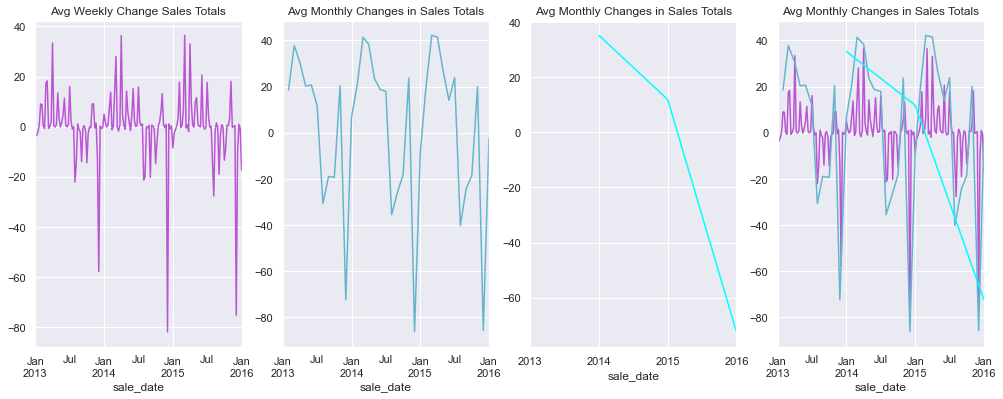

In [71]:
plt.subplots(1, 4, figsize=(17,6), sharey=True)
sns.set(style="darkgrid")
y = train.sales_total

plt.subplot(1,4,1)
y.resample('W').mean().diff().plot(title='Avg Weekly Change Sales Totals', color='mediumorchid')

plt.subplot(1,4,2)
y.resample('M').mean().diff().plot(title='Avg Monthly Changes in Sales Totals', color='c')

plt.subplot(1,4,3)
y.resample('Y').mean().diff().plot(title='Avg Monthly Changes in Sales Totals', color='cyan')

plt.subplot(1,4,4)
y.resample('W').mean().diff().plot(title='Avg Weekly Changes in Sales Totals', color='mediumorchid')
y.resample('M').mean().diff().plot(title='Avg Monthly Changes in Sales Totals', color='c')
y.resample('Y').mean().diff().plot(title='Avg Monthly Changes in Sales Totals', color='cyan')


NameError: name 'table' is not defined

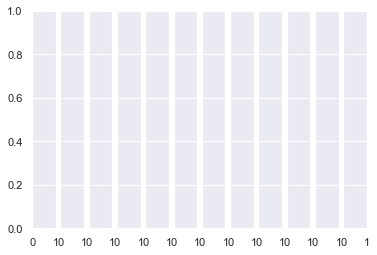

In [76]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month, color='mediumorchid')
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--', color='darkpurpl')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)